
#  <font color='red'>Projet Speed Dating</font> 


#  <font color='green'>Informations sur le Dataset</font>

#### Les données ont été recueillies auprès des participants à des événements expérimentaux de speed dating de 2002 à 2004. Au cours des événements, les participants auraient un « premier rendez-vous » de quatre minutes avec tous les autres participants du sexe opposé. À la fin de leurs quatre minutes, on a demandé aux participants s’ils aimeraient revoir leur date. On leur a également demandé d’évaluer leur date sur six attributs : attractivité, sincérité, intelligence, plaisir, ambition et intérêts partagés. ‎

###### iid : numéros unique d'un participant
###### id : numéros du participant lors du speed dating
###### colums gender : Femme = 0 ; Homme = 1
###### condtn : 1 = choix limités ; 2 = vaste choix
###### round : nombre de personnes rencontrées dans la soirée
###### position : 
###### position1:
###### order : le nombre de date avant de rencontrer le partenaire
###### partner : id du partenaire le soir de l'évenement
###### pid : iid du partenaire
###### match : 1 = oui ; 0 = non
###### samerace : le partenaire et le participant sont de même origines 1 = oui ; 2 = non
###### age_o : l'age du partenaire
###### race_o: l'origine du partenaire
###### age : âge
###### field : domaine d'études
###### race : Black/African American=1 ; European/Caucasian-American=2 ; Latino/Hispanic American=3 ; Asian/Pacific Islander/Asian-American=4 ;Native American=5 ; Other=6
###### imprace : note de 1 à 10 sur l'importance des  l'origine
###### imprelig : note de 1 à 10 sur l'importance de la religion
###### goal : L'objectif du speed dating : Semblait une soirée amusante = 1 ; Pour rencontrer de nouvelles personnes = 2 ; Pour obtenir une date = 3 ; A la recherche d'une relation sérieuse=4 ; Dire que je l'ai fait=5 ; Autre = 6
###### date : fréquance des rendez-vous : plusieurs fois par semaine = 1 ; 2 fois par semaine = 2 ; 1 fois par semaine = 3 ; 2 fois par mois = 4 ; 1 fois par mois = 5 ; quelques fois par an = 6 ; jamais = 7
###### go_out : la fréquence des sorties : plusieurs fois par semaine = 1 ; 2 fois par semaine = 2 ; 1 fois par semaine = 3 ; 2 fois par mois = 4 ; 1 fois par mois = 5 ; quelques fois par an = 6 ; jamais = 7
###### career : métier envisagé
###### note de 1 à 10 sur les activités (plusieurs colonnes (exemple : sport, musée, tv, music....)
###### exphappy : note de 1 à 10 sur le sentiment d'être heureux à ce spedd dating
###### expnum : sur les 20 personnes que le participant  va rencontrer, combien pense t il, seront intéressé de sortir avec lui/elle


# <font color='blue'>Importation des Bibliothèques</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  <font color='blue'>Chargement du Dataset. Manipulation du Dataset</font>

In [2]:
data_complet=pd.read_csv("Speed_Dating_Data.csv", encoding= 'unicode_escape')

In [3]:
print("La tête du DataSet complet")
data_complet.head()

La tête du DataSet complet


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Les dimensions du dataset sont de : {}".format(data_complet.shape))

Les dimensions du dataset sont de : (8378, 195)


In [5]:
nan = pd.DataFrame(data_complet.isnull().sum(), columns= ['nan_count'])
nan

,nan_count
iid,0
id,1
gender,0
idg,0
condtn,0
...,...
attr5_3,6362
sinc5_3,6362
intel5_3,6362
fun5_3,6362


### <font color='green'>Attention, les iid sont représentés plusieurs fois car chaque participant a réalisé plusieurs dates. Le code ci-dessous permet de récupérer les caractéristiques propres aux participants. Soit 552 participants</font>

In [6]:
personal = ['gender', 'age', 'field',
       'race', 'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 'career',
        'sports', 'tvsports', 'exercise', 'dining', 'museums','career',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum']
data_reduit = data_complet[['iid','wave'] + personal].drop_duplicates()

In [7]:
data_reduit['gender'] = data_reduit['gender'].apply(lambda x : 'Femme' if x == 0 else 'Homme')
data_reduit['race'] = data_reduit['race'].apply(lambda x : 'Africaine' if x == 1
                                               else 'Européenne' if x == 2
                                               else 'Latino' if x == 3
                                               else 'Asiatique' if x == 4
                                               else 'Americain' if x == 5
                                               else 'Autre')
data_reduit['goal'] = data_reduit['goal'].apply(lambda x : 'Soirée amusante' if x == 1
                                               else 'Rencontrer de nouvelles personne' if x ==2
                                               else 'Obtenir un rdv' if x == 3
                                               else 'Pvoir une relation sérieuse' if x == 4
                                               else "Pour dire je l'ai fait" if x == 5
                                               else 'Autre')
data_reduit['go_out'] = data_reduit['go_out'].apply(lambda x : 'Plusieurs fois par semaine' if x == 1
                                                   else '2 fois par semaine' if x == 2
                                                   else '1 fois par semaine' if x == 3
                                                   else '2 fois par mois' if x == 4
                                                   else '1 fois par mois' if x == 5
                                                   else 'Quelque fois par an' if x == 6
                                                   else 'Jamais')


In [8]:
print('Changement des variables catégorielles 1,2,3... Par leurs valeurs \nVoici la tête du Dataset avec les changements')
data_reduit.head()

Changement des variables catégorielles 1,2,3... Par leurs valeurs 
Voici la tête du Dataset avec les changements


,iid,wave,gender,age,field,race,imprace,imprelig,from,goal,...,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum
0,1,1,Femme,21.0,Law,Asiatique,2.0,4.0,Chicago,Rencontrer de nouvelles personne,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
10,2,1,Femme,24.0,law,Européenne,2.0,5.0,Alabama,Soirée amusante,...,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0
20,3,1,Femme,25.0,Economics,Européenne,8.0,4.0,Connecticut,Autre,...,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0
30,4,1,Femme,23.0,Law,Européenne,1.0,1.0,Texas,Soirée amusante,...,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0
40,5,1,Femme,21.0,Law,Européenne,8.0,1.0,Bowdoin College,Rencontrer de nouvelles personne,...,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0


In [9]:
# séparation en deux datasets homme et femme 
f = data_complet.loc[data_complet.gender == 0, :]
m = data_complet.loc[data_complet.gender == 1, :]

# <font color='blue'>Statistiques Descriptives du Dataset</font>

### Âge, genre, origines, ambitions

In [10]:
print("La moyenne d'âge (année) par genre est de :")
print(data_reduit.groupby('gender')['age'].mean().round(1))


La moyenne d'âge (année) par genre est de :
gender
Femme    26.1
Homme    26.6
Name: age, dtype: float64


Text(0.5, 1.0, "Boxplot : Distidution de l'âge en fonction du genre")

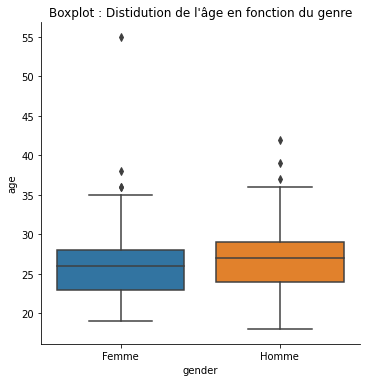

In [11]:
sns.catplot(x = 'gender', y = 'age', data = data_reduit, kind = 'box')
plt.title("Boxplot : Distidution de l'âge en fonction du genre")

C:\Users\marti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Les origines les plus représentées dans ce Dataset sont : Européen et Asiatique


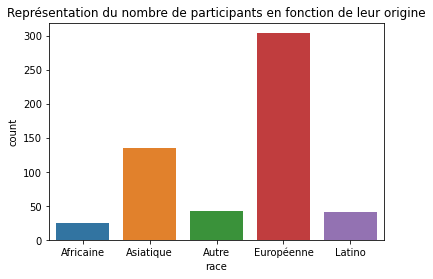

In [12]:
sns.countplot(data_reduit['race'].sort_values() )
plt.title("Représentation du nombre de participants en fonction de leur origine")
print("Les origines les plus représentées dans ce Dataset sont : Européen et Asiatique")


([<matplotlib.patches.Wedge at 0x234164f5520>,
 [Text(1.0879354682541844, 0.16246974153530405, 'Africaine'),
  Text(0.5262979460096839, 0.9659246720246811, 'Asiatique'),
  Text(-0.30031950376034666, 1.058209901513466, 'Autre race'),
  Text(-0.9956833113265198, -0.4675625557568281, 'Européenne'),
  Text(0.9733281533908029, -0.5124766392889044, 'Latino')],
 [Text(0.5934193463204642, 0.08861985901925674, '4.7%'),
  Text(0.28707160691437306, 0.5268680029225533, '24.7%'),
  Text(-0.1638106384147345, 0.5772054008255268, '0.0%'),
  Text(-0.5430999879962835, -0.25503412132190617, '55.2%'),
  Text(0.5309062654858925, -0.2795327123394024, '15.4%')])

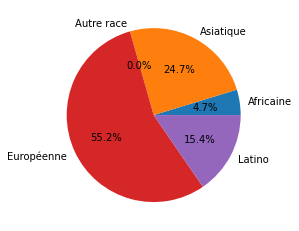

In [13]:
labels = 'Africaine', 'Asiatique', 'Autre race','Européenne', 'Latino'
sum_africain = 0
sum_asiatique = 0
sum_autre = 0
sum_europeen = 0
sum_latino = 0
size = []
for i in data_reduit['race']:
    if i == 'Africaine':
        sum_africain += 1
    elif i == 'Asiatique' :
        sum_asiatique += 1
    elif i == 'Autre race':
        sum_autre += 1
    elif i == 'Européenne':
        sum_europeen += 1
    else :
        sum_latino += 1
plt.pie([sum_africain,sum_asiatique,sum_autre,sum_europeen,sum_latino], labels=labels, autopct='%1.1f%%')

Les participants font des Speed Dating pour rencontrer principalement de nouvelles personnes sans prise de tête 
Il y a peu de différence entre les homme et les femmes


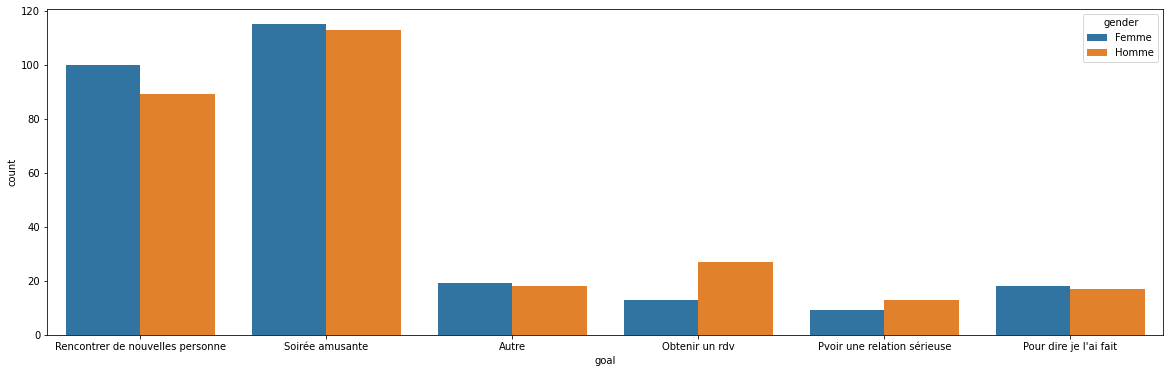

In [14]:
plt.figure(figsize = (20, 6))
ax = sns.countplot(x="goal", hue = 'gender', data=data_reduit)
print("Les participants font des Speed Dating pour rencontrer principalement de nouvelles personnes sans prise de tête \nIl y a peu de différence entre les homme et les femmes") 

# <font color='blue'>Quels facteurs va influencer la probabilité d'avoir un deuxième rendez-vous</font>

### L'influence du numéro du participant sur le match, Incroyable ! 
### Attentin, prendre en compte que les id jusqu'à 10, en effet l'ensemble des waves contiennent au moins 10 participants de chaque sex

In [15]:
no_love_count = len(data_complet[(data_complet['dec_o']==0) & (data_complet['dec']==1)]) 
+ len(data_complet[(data_complet['dec_o']==1) & (data_complet['dec']==0)])
perc_broken_heart = no_love_count / len(data_complet.index)


print("Il y a {:.2f}% de participants qui ont le coeur brisé. Ils voulaient un deuxième rendez-vous mais ce n'est pas reciproque".format(perc_broken_heart*100))

Il y a 25.52% de participants qui ont le coeur brisé. Ils voulaient un deuxième rendez-vous mais ce n'est pas reciproque


In [16]:
print("Statistique amusante !!! Avec le numéros 4 et 9 vous augmentez la probilité de faire un match !! ")
data_complet.groupby('id')['match'].sum().sort_values(ascending = False)

Statistique amusante !!! Avec le numéros 4 et 9 vous augmentez la probilité de faire un match !! 


id
4.0     102
9.0     102
6.0      98
8.0      97
2.0      96
5.0      84
7.0      84
1.0      83
10.0     70
3.0      66
16.0     66
11.0     64
12.0     58
14.0     56
15.0     54
13.0     50
17.0     45
18.0     37
19.0     32
20.0     22
22.0      8
21.0      6
Name: match, dtype: int64

In [17]:
pcm = (sum(data_complet.match)/len(data_complet.match))*100
print ("pourcentage de match : {:.2f}% ".format(pcm))

pourcentage de match : 16.47% 


In [18]:
df1 = data_complet.iloc[:, 11:35]
df2 = data_complet.iloc[:, 39:43]
df3 = data_complet.iloc[:, 45:67]
df4 = data_complet.iloc[:, 97:107]

data_complet = pd.concat([data_complet.iloc[:, 0],data_complet.iloc[:, 2],df1,df2,df3,df4], axis=1)

In [19]:
data_complet = data_complet.dropna()
print(data_complet.shape)

(5433, 62)


On remarque que pour la population femme, la décision ne ne pas poursuivre avec le participant est plus fréquente


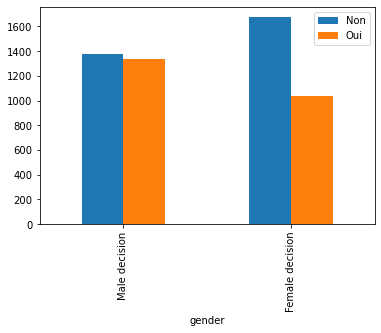

In [20]:
decision = pd.crosstab(data_complet.gender,data_complet.dec_o).plot(kind='bar')
plt.title =("Décision en fonction du genre")
plt.legend(["Non", "Oui"])
decision.set_xticklabels(['Male decision','Female decision'])

print("On remarque que pour la population femme, la décision ne ne pas poursuivre avec le participant est plus fréquente")

TypeError: 'str' object is not callable

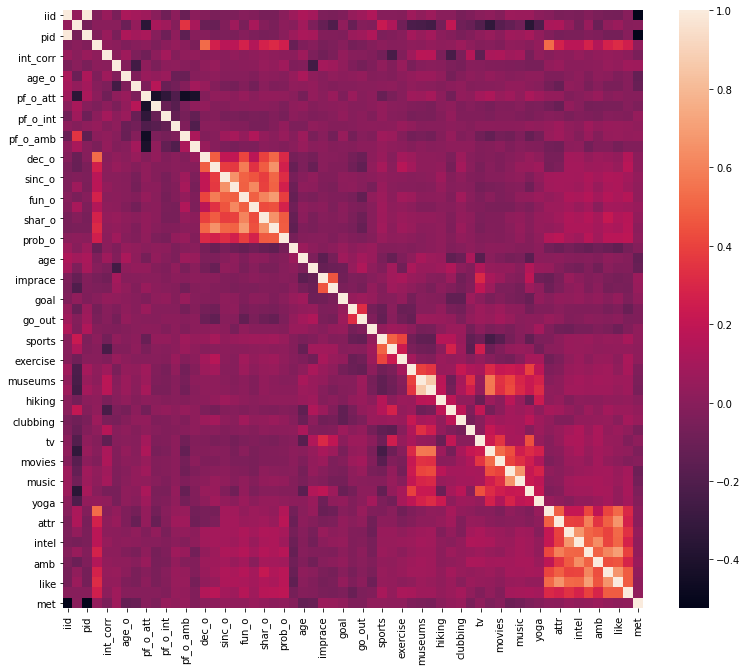

In [22]:
corr = data_complet.corr()

plt.figure(figsize=(13,11))
sns.heatmap(corr)

plt.title("Matrice de corrélation")
print("La matrice de corrélation est difficile à, mais on peut remarquer, qu'il y a un cluster de corrélation entre la décision et les attibus")

TypeError: 'str' object is not callable

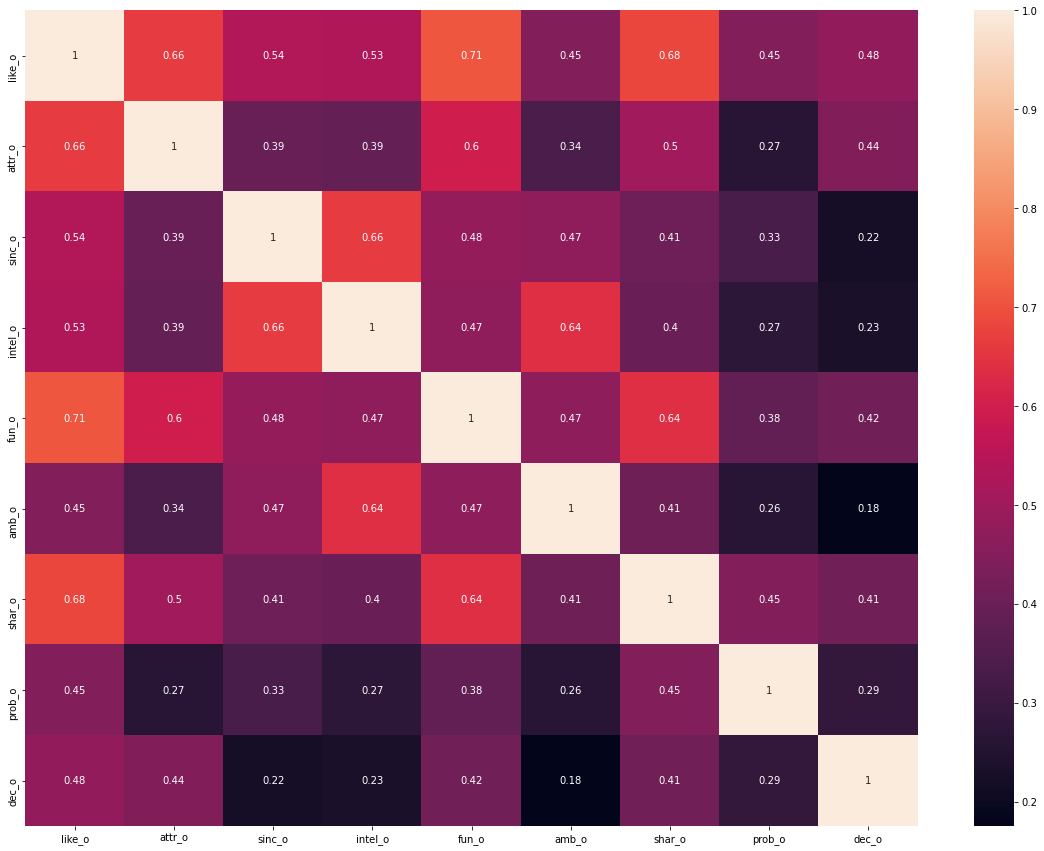

In [25]:
attribus = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o"]

data_attribus_homme = m[attribus]
data_attribus_femme = f[attribus]

corr_at_h = data_attribus_homme.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_at_h,annot=True)
plt.title('Matrice de corrélation entre les attribus et la décision ches les hommes')

TypeError: 'str' object is not callable

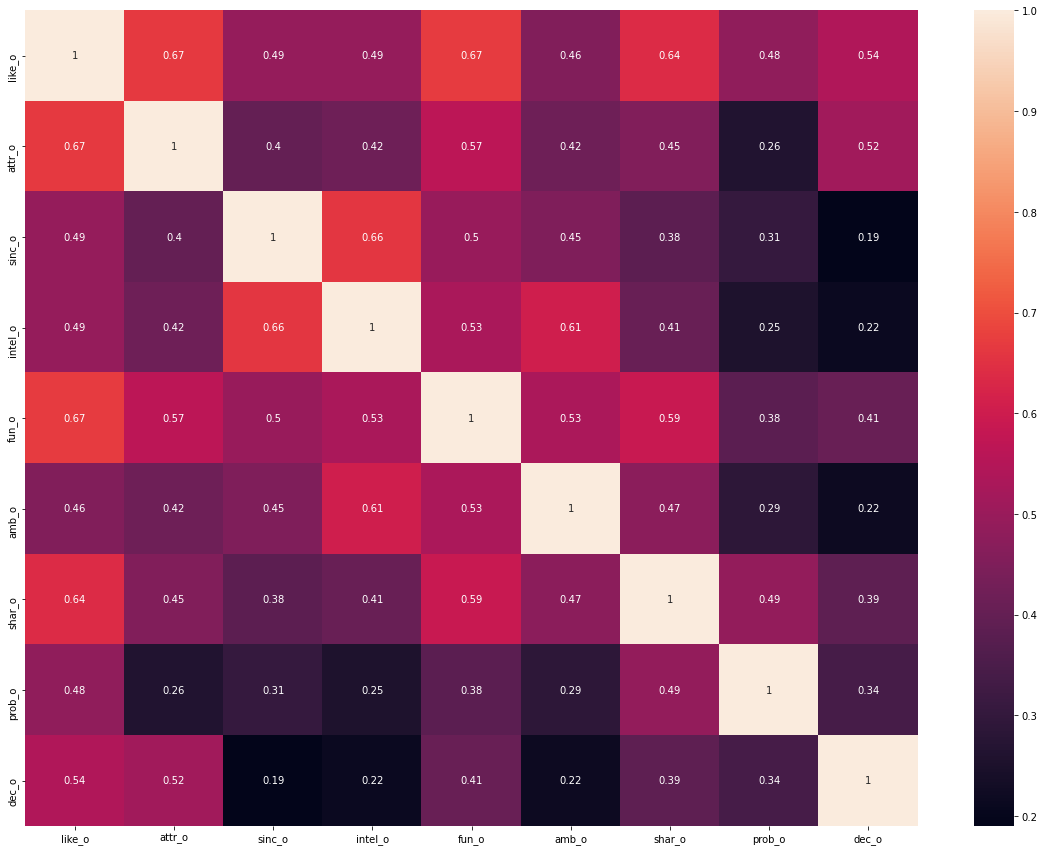

In [24]:
corr_at_f = data_attribus_femme.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_at_f,annot=True)
plt.title('Matrice de corrélation entre les attribus et la décision ches les femmes', fontsize=18)

#   <font color='red'>Conclusion</font> 

## Dans ce projet on peut retrouver dans un premier temps les statistiques descriptives du Dataset.
## Dans un second temps, on cherche des facteurs favorisant d'obtenir un match !!
## Conclusion : soyez vous même, fun, partagez les valeurs de votre date! 
## Bon courage !! 